# U.S. Medical Insurance Costs

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [147]:
df = pd.read_csv('insurance.csv')

print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [148]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


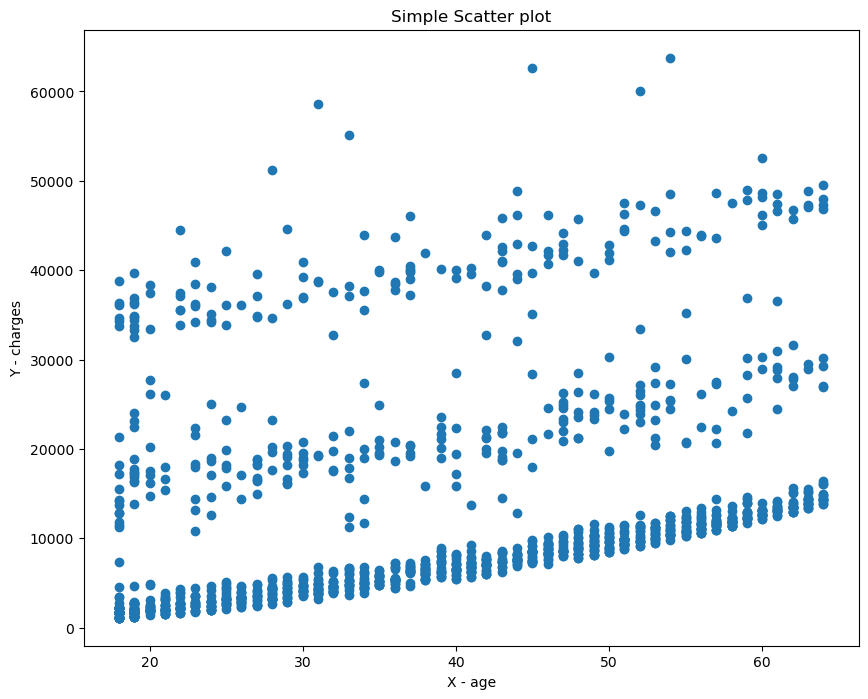

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.age, df.charges)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Simple Scatter plot')
plt.xlabel('X - age')
plt.ylabel('Y - charges')
plt.show()

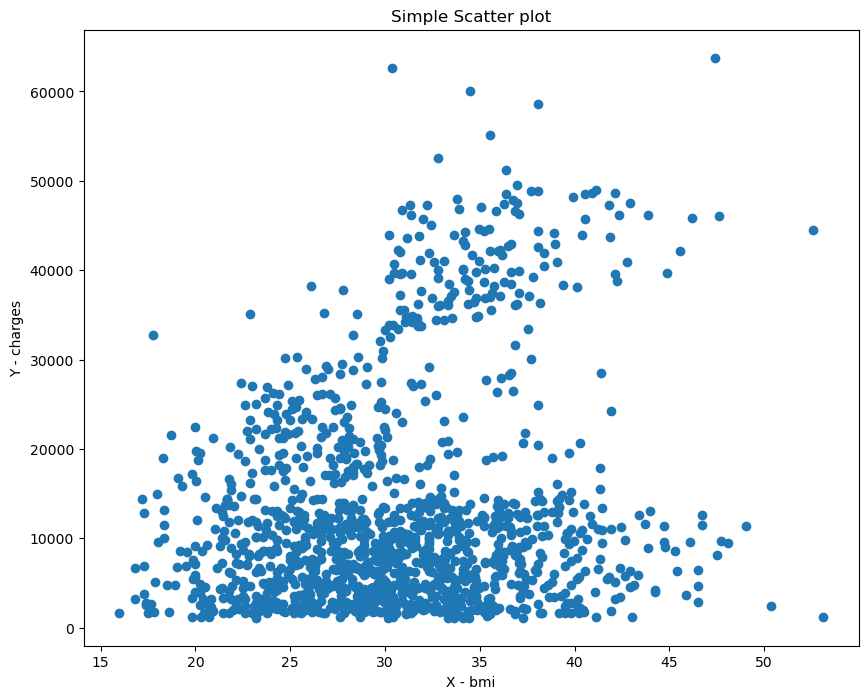

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.bmi, df.charges)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Simple Scatter plot')
plt.xlabel('X - bmi')
plt.ylabel('Y - charges')
plt.show()

In [151]:
gender = []
for i, row in df.iterrows():
    if df.sex[i] == 'female':
        gender.append(1)
    else:
        gender.append(0)

df['gender'] = gender
        
print(df)

      age     sex     bmi  children smoker     region      charges  gender
0      19  female  27.900         0    yes  southwest  16884.92400       1
1      18    male  33.770         1     no  southeast   1725.55230       0
2      28    male  33.000         3     no  southeast   4449.46200       0
3      33    male  22.705         0     no  northwest  21984.47061       0
4      32    male  28.880         0     no  northwest   3866.85520       0
...   ...     ...     ...       ...    ...        ...          ...     ...
1333   50    male  30.970         3     no  northwest  10600.54830       0
1334   18  female  31.920         0     no  northeast   2205.98080       1
1335   18  female  36.850         0     no  southeast   1629.83350       1
1336   21  female  25.800         0     no  southwest   2007.94500       1
1337   61  female  29.070         0    yes  northwest  29141.36030       1

[1338 rows x 8 columns]


In [152]:
import scipy.stats as stats

#calculate point-biserial correlation
stats.pointbiserialr(df.gender, df.charges)


PointbiserialrResult(correlation=-0.05729206220202536, pvalue=0.03613272100594507)

In [153]:
import scipy.stats as stats

#calculate point-biserial correlation
stats.pointbiserialr(df.children, df.charges)

PointbiserialrResult(correlation=0.06799822684790481, pvalue=0.012852128520141125)

In [154]:
smoking = []
for i, row in df.iterrows():
    if df.smoker[i] == 'yes':
        smoking.append(1)
    else:
        smoking.append(0)
        

df['smoking'] = smoking
        
print(df)

      age     sex     bmi  children smoker     region      charges  gender  \
0      19  female  27.900         0    yes  southwest  16884.92400       1   
1      18    male  33.770         1     no  southeast   1725.55230       0   
2      28    male  33.000         3     no  southeast   4449.46200       0   
3      33    male  22.705         0     no  northwest  21984.47061       0   
4      32    male  28.880         0     no  northwest   3866.85520       0   
...   ...     ...     ...       ...    ...        ...          ...     ...   
1333   50    male  30.970         3     no  northwest  10600.54830       0   
1334   18  female  31.920         0     no  northeast   2205.98080       1   
1335   18  female  36.850         0     no  southeast   1629.83350       1   
1336   21  female  25.800         0     no  southwest   2007.94500       1   
1337   61  female  29.070         0    yes  northwest  29141.36030       1   

      smoking  
0           1  
1           0  
2           0  

In [155]:
import scipy.stats as stats

#calculate point-biserial correlation
stats.pointbiserialr(df.smoking, df.charges)

PointbiserialrResult(correlation=0.7872514304984775, pvalue=8.271435842176839e-283)

In [156]:
y = df.charges


X = df[['age','bmi']].copy()

print(X)





      age     bmi
0      19  27.900
1      18  33.770
2      28  33.000
3      33  22.705
4      32  28.880
...   ...     ...
1333   50  30.970
1334   18  31.920
1335   18  36.850
1336   21  25.800
1337   61  29.070

[1338 rows x 2 columns]


In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [158]:
# Create two models: Polynomial and linear regression
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression(fit_intercept=False))
linreg = LinearRegression()

In [159]:
# Cross-validation
scoring = "neg_root_mean_squared_error"
polyscores = cross_validate(polyreg, X_train, y_train, scoring=scoring, return_estimator=True)
linscores = cross_validate(linreg, X_train, y_train, scoring=scoring, return_estimator=True)

In [160]:
# Which one is better? Linear and polynomial
print("Linear regression score:", linscores["test_score"].mean())
print("Polynomial regression score:", polyscores["test_score"].mean())
print("Difference:", linscores["test_score"].mean() - polyscores["test_score"].mean())

Linear regression score: -11257.410708522495
Polynomial regression score: -11293.60811325757
Difference: 36.19740473507409


In [161]:
print("Coefficients of polynomial regression and linear regression:")
# Let's show the coefficient of the last fitted polynomial regression
# This starts from the constant term and in ascending order of powers
print(polyscores["estimator"][0].steps[1][1].coef_)
# And show the coefficient of the last-fitted linear regression
print(linscores["estimator"][0].intercept_, linscores["estimator"][-1].coef_)

Coefficients of polynomial regression and linear regression:
[-8.07889159e+03  3.07381551e+02  3.48046472e+02 -1.41842362e-01
 -1.51623325e+00  5.15651533e-01]
-6562.739814935892 [255.06888561 313.47508641]


In [162]:
# Retrain the model and evaluate
import sklearn
linreg = sklearn.base.clone(linreg)
linreg.fit(X_train, y_train)
print("Test set RMSE:", mean_squared_error(y_test, linreg.predict(X_test), squared=False))
print("Mean validation RMSE:", -linscores["test_score"].mean())

Test set RMSE: 11888.502384017522
Mean validation RMSE: 11257.410708522495
